In [2]:
!pip install numpy
!pip install pandas

In [19]:
from datetime import timedelta

In [6]:
# Data Loading
import pandas as pd
import numpy as np

results = pd.read_csv('results.csv', na_values='\\N')

In [41]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,0 days 01:34:50.616000,5690616.0,39.0,2.0,0 days 00:01:27.452000,218.300,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,0 days 00:00:05.478000,5696094.0,41.0,3.0,0 days 00:01:27.739000,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,0 days 00:00:08.163000,5698779.0,41.0,5.0,0 days 00:01:28.090000,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,0 days 00:00:17.181000,5707797.0,58.0,7.0,0 days 00:01:28.603000,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,0 days 00:00:18.014000,5708630.0,43.0,1.0,0 days 00:01:27.418000,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47.0,12,16.0,16,16,0.0,57,NaT,NaN,39.0,12.0,0 days 00:01:29.833000,211.632,11
25836,25842,1096,825,210,20.0,16,17.0,17,17,0.0,57,NaT,NaN,40.0,20.0,0 days 00:01:31.158000,208.556,11
25837,25843,1096,1,131,44.0,5,18.0,18,18,0.0,55,NaT,NaN,42.0,11.0,0 days 00:01:29.788000,211.738,9
25838,25844,1096,849,3,6.0,20,19.0,19,19,0.0,55,NaT,NaN,45.0,14.0,0 days 00:01:30.309000,210.517,130


In [23]:
# Convert 'fastestLapTime' to timedelta
results['fastestLapTime'] = pd.to_timedelta("00:" + results['fastestLapTime'])

In [35]:
import re

In [36]:
# Convert 'time' to timedelta
relative_time_pattern = re.compile(r'^\+(\d+\.\d+)$')       
minute_time_pattern = re.compile(r'^\d+:\d{2}\.\d{3}$')      
full_time_pattern = re.compile(r'^\d{1,2}:\d{2}:\d{2}\.\d{3}$')  

def convert_time(value):
    if pd.isna(value):
        return np.nan  
    
    elif relative_time_pattern.match(value):
        seconds = float(value[1:])  
        return pd.to_timedelta(seconds, unit='s')
    
    elif minute_time_pattern.match(value):
        return pd.to_timedelta('00:' + value)  

    elif full_time_pattern.match(value):
        return pd.to_timedelta(value)  

    else:
        return pd.NaT

results['time'] = results['time'].apply(convert_time)


In [42]:
# Filter to include only drivers who finished in the top 5 positions
top_5 = results.query('position <= 5')
print(top_5)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,0 days 01:34:50.616000,5690616.0,39.0,2.0,0 days 00:01:27.452000,218.300,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,0 days 00:00:05.478000,5696094.0,41.0,3.0,0 days 00:01:27.739000,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,0 days 00:00:08.163000,5698779.0,41.0,5.0,0 days 00:01:28.090000,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,0 days 00:00:17.181000,5707797.0,58.0,7.0,0 days 00:01:28.603000,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,0 days 00:00:18.014000,5708630.0,43.0,1.0,0 days 00:01:27.418000,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25820,25826,1096,830,9,1.0,1,1.0,1,1,25.0,58,0 days 01:27:45.914000,5265914.0,54.0,6.0,0 days 00:01:29.392000,212.676,1
25821,25827,1096,844,6,16.0,3,2.0,2,2,18.0,58,0 days 00:00:08.771000,5274685.0,48.0,10.0,0 days 00:01:29.719000,211.901,1
25822,25828,1096,815,9,11.0,2,3.0,3,3,15.0,58,0 days 00:00:10.093000,5276007.0,52.0,4.0,0 days 00:01:28.972000,213.680,1
25823,25829,1096,832,6,55.0,4,4.0,4,4,12.0,58,0 days 00:00:24.892000,5290806.0,50.0,3.0,0 days 00:01:28.879000,213.904,1


In [43]:
# Identify missing values in the 'time' column, fill them with the median race time
median_time = results['time'].median()
results['time'] = results['time'].fillna(median_time)
print(results['time'])

In [52]:
# Calculate total points earned by each driver
results['points'].dtype
results['points'] = pd.to_numeric(results['points'], errors='coerce')
total_points = results.groupby('driverId').agg(TotalPoints=('points', 'sum')).reset_index()
print(total_points)

     driverId  TotalPoints
0           1       4396.5
1           2        259.0
2           3       1594.5
3           4       2061.0
4           5        105.0
..        ...          ...
850       852         44.0
851       853          0.0
852       854         12.0
853       855          6.0
854       856          2.0

[855 rows x 2 columns]


In [53]:
# Determine which `constructorId` has the highest number of first-place finishes
first_place_finishes = results.query('position == 1')
constructor_wins = first_place_finishes.groupby('constructorId').agg(NumberOfWins=('position', 'count')).reset_index()
top_constructor = constructor_wins.nlargest(1, 'NumberOfWins')
print(top_constructor)

   constructorId  NumberOfWins
5              6           243


In [54]:
# Calculate avg 'fastestLapSpeed' for each 'raceId'
results['fastestLapSpeed'] = pd.to_numeric(results['fastestLapSpeed'], errors='coerce')
avg_fastest_lap_speed = results.groupby('raceId').agg(AverageFastestLapSpeed=('fastestLapSpeed', 'mean')).reset_index()
print(avg_fastest_lap_speed)

      raceId  AverageFastestLapSpeed
0          1              214.918895
1          2              202.320556
2          3              171.060450
3          4              204.150650
4          5              199.641562
...      ...                     ...
1074    1092              196.660722
1075    1093              195.484737
1076    1094              187.508450
1077    1095              207.119389
1078    1096              211.681050

[1079 rows x 2 columns]


In [55]:
# Identify top 3 drivers with the lowest avg 'positionOrder'
results['positionOrder'] = pd.to_numeric(results['positionOrder'], errors='coerce')
avg_position = results.groupby('driverId').agg(AveragePosition=('positionOrder', 'mean')).reset_index()
top_3_drivers = avg_position.nsmallest(3, 'AveragePosition')
print(top_3_drivers)

     driverId  AveragePosition
590       591              2.0
801       802              2.0
765       766              3.5


In [56]:
import matplotlib.pyplot as plt

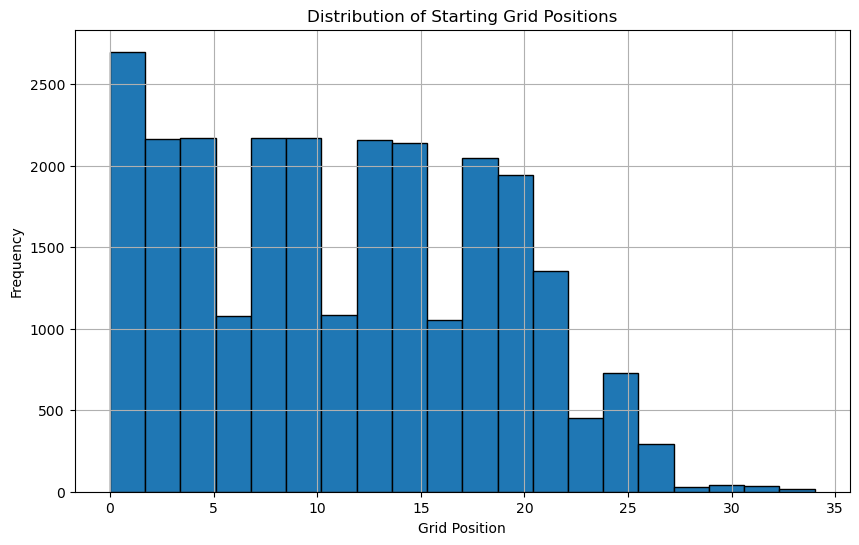

In [57]:
# Histogram: distribution of 'grid' positions from which drivers started the races
results['grid'] = pd.to_numeric(results['grid'], errors='coerce')

plt.figure(figsize=(10, 6))
results['grid'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Starting Grid Positions')
plt.xlabel('Grid Position')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [58]:
# Identify drivers who have finished every race they entered, return a list of their driverIds
finished_all_races = results.groupby('driverId').filter(lambda x: (x['statusId'] == 1).all())
drivers_finished_all = finished_all_races['driverId'].unique()
print(drivers_finished_all)

[515 557 591 674 727 802 851 856]


In [59]:
# For each driver, find the fastest `fastestLapTime` they have achieved
fastest_lap_times = results.groupby('driverId').agg(FastestLapTime=('fastestLapTime', 'min')).reset_index()
print(fastest_lap_times)

     driverId         FastestLapTime
0           1 0 days 00:01:06.719000
1           2 0 days 00:01:13.095000
2           3 0 days 00:01:08.491000
3           4 0 days 00:01:08.405000
4           5 0 days 00:01:13.998000
..        ...                    ...
850       852 0 days 00:01:08.455000
851       853 0 days 00:01:09.757000
852       854 0 days 00:01:09.394000
853       855 0 days 00:01:09.380000
854       856 0 days 00:01:26.624000

[855 rows x 2 columns]


In [60]:
# Compute the correlation coefficient between starting 'grid' position and final 'position'.
results_clean = results.dropna(subset=['grid', 'position'])
correlation = results_clean['grid'].corr(results_clean['position'])
print(f"Correlation coefficient between grid position and final position: {correlation}")

Correlation coefficient between grid position and final position: 0.6432946507834114
